In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
kaggle_credentials= json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME']= kaggle_credentials["username"]
os.environ['KAGGLE_KEY']= kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:22<00:00, 200MB/s]
100% 2.04G/2.04G [00:22<00:00, 95.8MB/s]


In [ ]:
!ls

Blackrotcanker.jpg  img_apple.jpeg  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
zip_ref = ZipFile('plantvillage-dataset.zip', 'r')
zip_ref.extractall()
# zip_ref.close()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

['grayscale', 'segmented', 'color']
38
['Tomato___Late_blight', 'Strawberry___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Grape___Black_rot']
38
['Tomato___Late_blight', 'Strawberry___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Grape___Black_rot']
38
['Tomato___Late_blight', 'Strawberry___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Grape___Black_rot']


In [ ]:
samp_img_path= '/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'

img= mpimg.imread(samp_img_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(256, 256, 3)


In [ ]:
base_dir= 'plantvillage dataset/color'
img_size= 256
batch_size= 32

In [ ]:
data_gen= ImageDataGenerator(
    rescale= 1./255,
    validation_split=0.2
)

In [ ]:
# train
train_gen= data_gen.flow_from_directory(
    base_dir,
    target_size= (img_size, img_size),
    batch_size= batch_size,
    subset= 'training',
    class_mode= 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# validation
validation_gen= data_gen.flow_from_directory(
    base_dir,
    target_size= (img_size, img_size),
    batch_size= batch_size,
    subset= 'validation',
    class_mode= 'categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model= models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape=(img_size, img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [ ]:
model_training_detail= model.fit(
    train_gen,
    steps_per_epoch= train_gen.samples//batch_size,
    epochs= 30,
    validation_data= validation_gen,
    validation_steps= validation_gen.samples//batch_size
)

Epoch 1/30
1358/1358 [==============================] - 121s 89ms/step - loss: 0.2786 - accuracy: 0.9115 - val_loss: 0.4000 - val_accuracy: 0.8790
Epoch 2/30
1358/1358 [==============================] - 121s 89ms/step - loss: 0.1280 - accuracy: 0.9570 - val_loss: 0.5788 - val_accuracy: 0.8547
Epoch 3/30
1358/1358 [==============================] - 122s 90ms/step - loss: 0.0796 - accuracy: 0.9738 - val_loss: 0.6045 - val_accuracy: 0.8650
Epoch 4/30
1358/1358 [==============================] - 120s 88ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.5777 - val_accuracy: 0.8672
Epoch 5/30
1358/1358 [==============================] - 120s 88ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.8877 - val_accuracy: 0.8400
Epoch 6/30
1358/1358 [==============================] - 119s 87ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.8396 - val_accuracy: 0.8443
Epoch 7/30
1358/1358 [==============================] - 119s 87ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0

Model Evaluation

In [ ]:
print("Evaluating Model.........")
val_loss, val_accu= model.evaluate(validation_gen, steps=validation_gen.samples//batch_size)
print(f"Model Accuracy: {val_accu*100:.2f}%")

Evaluating Model.........
339/339 [==============================] - 21s 61ms/step - loss: 2.0193 - accuracy: 0.8446
Model Accuracy: 84.46%


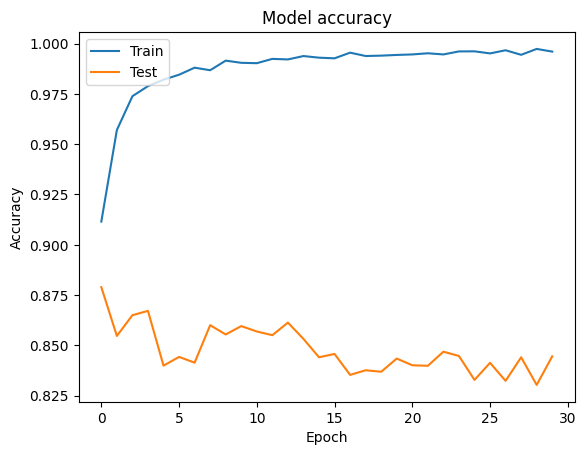

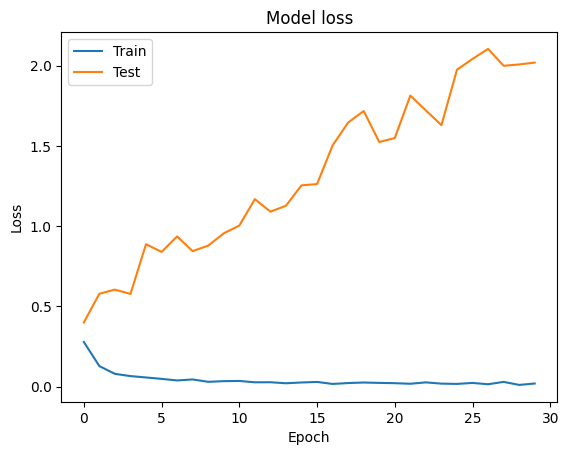

In [ ]:
# Plot training & validation accuracy values
plt.plot(model_training_detail.history['accuracy'])
plt.plot(model_training_detail.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_training_detail.history['loss'])
plt.plot(model_training_detail.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def image_to_array(img_path, target_size=(256,256)):
  img= Image.open(img_path)
  img= img.resize(target_size)
  img_arr= np.array(img)
  img_arr= np.expand_dims(img_arr,axis=0)
  img_arr= img_arr.astype('float32')/255
  return img_arr

def pred_img_class(model, img_path, class_indices):
  prepro_img= image_to_array(img_path)
  pred= model.predict(prepro_img)
  pred_class_index = np.argmax(pred, axis=1)[0]
  pred_class_name = class_indices[pred_class_index]
  return pred_class_name

In [ ]:
class_indices = {v: k for k, v in train_gen.class_indices.items()}
# class_indices

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

NameError: name 'json' is not defined

In [ ]:
# Example Usage
image_path = '/test_potato_early_blight.jpg'
#image_path = '/content/Marssoninaleafblotch.jpg'
pred_class_name = pred_img_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", pred_class_name)

1/1 [==============================] - 0s 31ms/step
Predicted Class Name: Potato___Early_blight


In [ ]:
model.save('drive/MyDrive/model.h5')

In [ ]:
model.save('model.h5')